In [1]:
import yaml
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")

from electronfactors.model.utilities import *

In [2]:
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif',
             'size':'16'})
rc('text', usetex=True)

In [4]:
def create_histogram(energy):
    
    width, length, eqPonA, factor = pull_data(energy=energy)   
    percent_prediction_differences = calculate_percent_prediction_differences(width, eqPonA, factor)    
    
    plt.figure(figsize=(6 * 1.618, 6))

    bins = np.arange(-1.5, 2, 0.5)
    dbins = bins[1] - bins[0]
    binsTrans = bins - dbins/2

    binsTrans = binsTrans.reshape(-1,1)
    binNum = np.argmin(abs(binsTrans - percent_prediction_differences),0)

    representative_height = np.zeros(len(binNum))

    for i in range(len(bins)):
        binRef = (binNum == i)
        representative_height[binRef] = np.arange(sum(binRef)) + 1

    plt.hist(percent_prediction_differences, bins, alpha=0.6, lw=2)
    plt.scatter(percent_prediction_differences, representative_height, zorder=2, s=120, alpha=0.8, lw=1.5)

    plt.xlabel(
        r'\% Prediction Difference '
        r'$\left[100 \times \frac{\mbox{measured } - \mbox{ predicted}}{\mbox{measured}} \right]$')
    plt.ylabel(r'Frequency')
    plt.title(r'Histogram of percent prediction differences for ' + str(energy) + r' MeV')

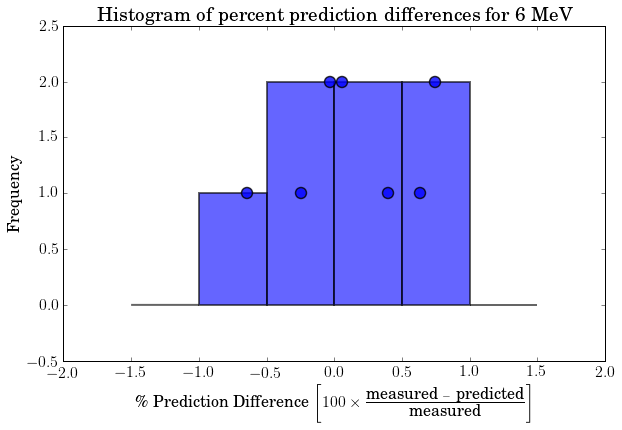

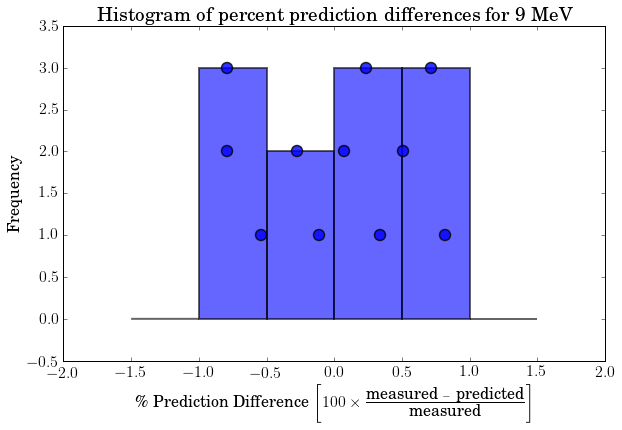

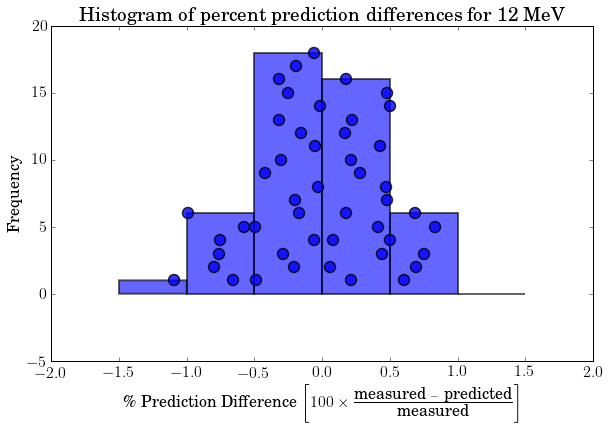

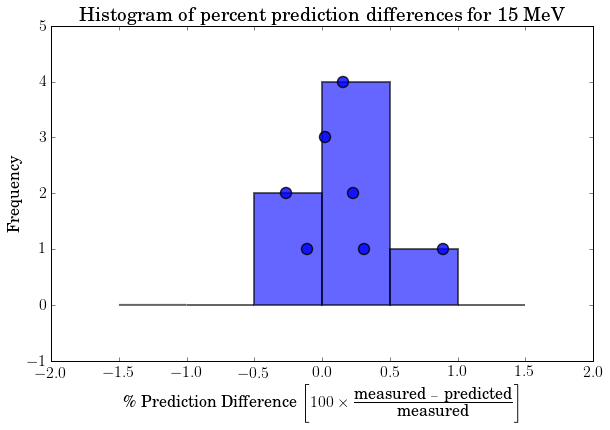

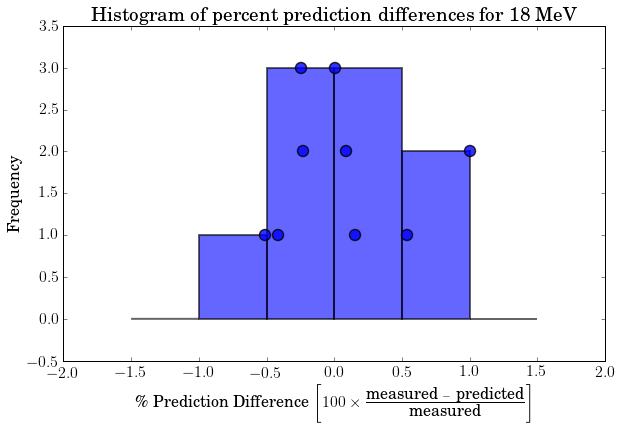

In [5]:
for i in [6, 9, 12, 15, 18]:
    create_histogram(i)